In [2]:
import numpy as np
import nengo
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

# GaussInput

In [7]:
def one_dimensional_peak(p, std, a, size=10):
    x = np.arange(size)

    activations = a * np.exp(-0.5*(x-p)**2/std**2)

    return activations

def two_dimensional_peak(p, std, a, size=[10,10]):
    
    x = np.arange(size[0])
    y = np.arange(size[1])
    grid_x, grid_y = np.meshgrid(x, y)
    

    activations = a * np.exp(-0.5*((grid_x - p[0])**2/std[0]**2 + \
                                   (grid_y - p[1])**2/std[1]**2))

    return activations

def three_dimensional_peak(p, std, a, size=[10,10,10]):
    x = np.arange(size[0])
    y = np.arange(size[1])
    z = np.arange(size[2])
    grid_x, grid_y, grid_z = np.meshgrid(x, y, z)

    activations = a * np.exp(-0.5 * ((grid_x - p[0])**2 /std[0]**2 + \
                                     (grid_y - p[1])**2 /std[1]**2 + \
                                     (grid_z - p[2])**2 /std[2]**2))

    return activations

def make_gaussian(sizes, centers, sigmas, a):
    if len(sizes) == 1:
        activations = one_dimensional_peak(centers[0], sigmas[0], a, sizes[0])
        
    elif len(sizes) == 2:
        activations = two_dimensional_peak(centers, sigmas, a, sizes)
        
    elif len(sizes) == 3:
        activations = three_dimensional_peak(centers, sigmas, a, sizes)
        
    # TODO: what to do if len(sizes) not between 1 and 3?
    return activations

In [8]:
class GaussInput(object):
    def __init__(self, sizes, centers, sigmas, a):
        
        # add asserts to check if sizes same length as centers and sigmas
        self.sizes = sizes
        self.centers = centers
        self.sigmas = sigmas
        self.a = a
        
    def make_node(self):
        return nengo.Node(make_gaussian(self.sizes, self.centers, self.sigmas, self.a).flatten())

In [11]:
model1 = nengo.Network()

with model1:
    
    gi = GaussInput([10,10], [2,4], [2,2], 3).make_node()
    
    probe_gi = nengo.Probe(gi)
    
sim1 = nengo.Simulator(model1)
with sim1:
    sim1.run(0.01)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

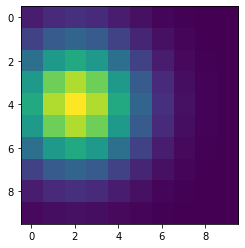

In [15]:
# check GaussInput

plt.figure()
plt.imshow(sim1.data[probe_gi][1].reshape(10,10))
plt.show()

# ConstMatrix

In [16]:
class ConstMatrix(object):
    def __init__(self, sizes, value):
        self.sizes = sizes
        self.value = value
        
    def make_node(self):
        return nengo.Node(np.ones(np.prod(self.sizes))*self.value)

In [21]:
model2 = nengo.Network()

with model2:
    
    cm = ConstMatrix([10,10], 42).make_node()
    
    probe_cm = nengo.Probe(cm)
    
sim2 = nengo.Simulator(model2)
with sim2:
    sim2.run(0.01)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [25]:
print(sim2.data[probe_cm][1])

[42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42.
 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42.
 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42.
 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42.
 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42. 42.
 42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]


# ComponentMultiply

In [26]:
class ComponentMultiply(object):
    def __init__(self, sizes):
        self.sizes = sizes
        
    def update(self, inp):
        size = np.prod(self.sizes)
        inp1 = inp[:size]
        inp2 = inp[size:]
        
        return inp1 * inp2
    
    def make_node(self):
        return nengo.Node(lambda t, x: self.update(x), size_in=np.prod(self.sizes)*2, 
                          size_out=np.prod(self.sizes))

In [33]:
model3 = nengo.Network()

with model3:
    
    inp1 = nengo.Node(np.arange(16))
    inp2 = nengo.Node(np.ones(16)*3)
    compmul = ComponentMultiply([4,4]).make_node()
    
    nengo.Connection(inp1, compmul[:16], synapse=0)
    nengo.Connection(inp2, compmul[16:], synapse=0)
    
    probe_compmul = nengo.Probe(compmul)
    
sim3 = nengo.Simulator(model3)
with sim3:
    sim3.run(0.01)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [34]:
print(sim3.data[probe_compmul][:3])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45.]
 [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45.]]


# StaticGain

In [35]:
class StaticGain(object):
    def __init__(self, sizes, gain_factor):
        self.sizes = sizes
        self.gain_factor = gain_factor
        
    def update(self, inp):
        return inp * self.gain_factor
    
    def make_node(self):
        return nengo.Node(lambda t, x: self.update(x), size_in=np.prod(self.sizes))

In [38]:
model4 = nengo.Network()

with model4:
    
    inp1 = nengo.Node(np.arange(16))
    sg = StaticGain([4,4], 3).make_node()
    
    nengo.Connection(inp1, sg, synapse=0)

    probe_sg = nengo.Probe(sg)
    
sim4 = nengo.Simulator(model4)
with sim4:
    sim4.run(0.01)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [39]:
print(sim4.data[probe_sg][:3])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45.]
 [ 0.  3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45.]]


# Flip

In [47]:
class Flip(object):
    def __init__(self, sizes, flip_dimensions):
        self.sizes = sizes
        self.flip_dimensions = flip_dimensions
        
    def update(self, inp):
        
        out = inp.reshape(*self.sizes)
        if self.flip_dimensions[0]:
            out = np.flip(out, axis=0)
        if self.flip_dimensions[1]:
            out = np.flip(out, axis=1)
            
        return out.flatten()
    
    def make_node(self):
        return nengo.Node(lambda t, x: self.update(x), size_in=np.prod(self.sizes), 
                          size_out=np.prod(self.sizes))
            

In [48]:
model5 = nengo.Network()

with model5:
    
    inp1 = nengo.Node(np.arange(16))
    flip_tt = Flip([4,4], [True, True]).make_node()
    flip_tf = Flip([4,4], [True, False]).make_node()
    flip_ff = Flip([4,4], [False, False]).make_node()
    
    nengo.Connection(inp1, flip_tt, synapse=0)
    nengo.Connection(inp1, flip_tf, synapse=0)
    nengo.Connection(inp1, flip_ff, synapse=0)

    probe_tt = nengo.Probe(flip_tt)
    probe_tf = nengo.Probe(flip_tf)
    probe_ff = nengo.Probe(flip_ff)
    
sim5 = nengo.Simulator(model5)
with sim5:
    sim5.run(0.01)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

In [49]:
print(sim5.data[probe_tt][1])
print()
print(sim5.data[probe_tf][1])
print()
print(sim5.data[probe_ff][1])
print()

[15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

[12. 13. 14. 15.  8.  9. 10. 11.  4.  5.  6.  7.  0.  1.  2.  3.]

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]



# Projection

In [ ]:
class Projection(object):
    def __init__(self, sizes_out, dimension_mapping, compression_type):
        
        
    def update(self, inp):
        
        
        # either downsizing
        
        
        # or upsizing
        # use np.expand_dims() and np.repeat() for upsizing